## BERT Fine-tuned 'all-MiniLM-L6-v2'

In [1]:
# Importando bibliotecas e funções
from libs import *
from utils import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\domaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


BERT, ou Bidirectional Encoder Representations from Transformers, é um modelo de linguagem pré-treinado que foi introduzido em 2018 pelo Google. Ele é baseado em um modelo de transformador, que é um tipo de rede neural que pode aprender relações entre palavras em uma frase, em vez de apenas uma por uma em ordem.

O BERT pode ser usado para uma variedade de tarefas de processamento de linguagem natural (NLP), inclusive para gerar embeddings contextualizadas, que são representações de palavras que levam em consideração o contexto em que a palavra é usada. Isso pode ser útil para uma variedade de tarefas de NLP, pois pode ajudar o modelo a entender o significado de palavras em diferentes contextos.

Neste projeto, realizamos o experimento de avaliar o impacto da utilização do BERT ao alimentar nosso modelo de classificação com features textuais (títulos e descrições dos vídeos) e verificar os respectivos resultados. O modelo base da biblioteca `transformers` está disponível no Hugging Face Hub.

**SentenceTransformers** é um framework estado da arte em Python para embeddings de sentenças, texto e imagens. Ele usa modelos de linguagem pré-treinados para transformar texto em vetores significativos, chamados de embeddings. Essas representações contextualizados podem ser aplicadas em tarefas de processamento de linguagem natural de maneira eficiente. A sua utilização é trivial e mais simples ao comparar com outras bibliotecas e por isso foi escolhida para esse projeto.

- Hugging Face:  https://huggingface.co/sentence-transformers
- Documentação: https://www.sbert.net/
- Artigo: https://arxiv.org/abs/1908.10084

1. Instalando a biblioteca `sentence-transformers`

In [2]:
# Instalando framework via pip
#!pip install -U sentence-transformers

2. Importando bibliotecas necessárias para tarefa de gerar representações textuais (embeddings)

In [3]:
# Sentence-transformers
from sentence_transformers import SentenceTransformer

3. Carregando base de dados em um DataFrame do Pandas

In [4]:
# Definindo dataframe preprocessado antes dos pipelines
df_bert = pd.read_csv('data/data1.csv') # data1 (texto bruto) ou data2 ou data3 (texto preprocessado)

In [5]:
# Amostra de 10%
#df_bert = df_bert.sample(frac=0.1, random_state=42) 

In [6]:
# Dimensões
df_bert.shape

(36642, 18)

In [7]:
# Definindo colunas numéricas, categóricas e textuais
numeric_features = ['year', 'video_count', 'view_count_x', 'subscriber_count', 
                    'aux_status', 'comment_count_y','dislike_count', 'view_count_y',
                        'like_count', 'video_duration', 'published_at']

categorical_features = ['channel_id','category', 'gender']

textual_features = ['video_title', 'video_desc']

In [8]:
# Substituindo valores nulos por uma string vazia
df_bert[textual_features] = df_bert[textual_features].fillna('')

4. Divisão dos dados em treino e teste, de maneira a evitar vazamento de dados (data leakage)


In [9]:
# Definindo características e alvo
#X = df_bert[textual_features + categorical_features]
X = df_bert[textual_features]
y = df_bert['popularity']

X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
"""
# Aplicando OneHotEncoder nas colunas categóricas com handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_bert_categorical = encoder.fit_transform(X_train_bert[categorical_features])
X_test_bert_categorical = encoder.transform(X_test_bert[categorical_features])

# 3 features categóricas representadas em matriz esparsa
print(X_train_bert_categorical[0])

# 3 features categóricas representadas em matriz densa
print(X_train_bert_categorical.toarray()[0])

# Transformando as features categóricas em matriz densa (array) para combinar com outras features no futuro
X_train_bert_categorical = X_train_bert_categorical.toarray()
X_test_bert_categorical = X_test_bert_categorical.toarray()
"""

"\n# Aplicando OneHotEncoder nas colunas categóricas com handle_unknown='ignore'\nencoder = OneHotEncoder(handle_unknown='ignore')\n\nX_train_bert_categorical = encoder.fit_transform(X_train_bert[categorical_features])\nX_test_bert_categorical = encoder.transform(X_test_bert[categorical_features])\n\n# 3 features categóricas representadas em matriz esparsa\nprint(X_train_bert_categorical[0])\n\n# 3 features categóricas representadas em matriz densa\nprint(X_train_bert_categorical.toarray()[0])\n\n# Transformando as features categóricas em matriz densa (array) para combinar com outras features no futuro\nX_train_bert_categorical = X_train_bert_categorical.toarray()\nX_test_bert_categorical = X_test_bert_categorical.toarray()\n"

5. Carregando modelo BERT através do framework estado da arte Sentence-Transformers para a criação de representações textuais.

- Modelos nativamente disponíveis: [Pretrained Models](https://www.sbert.net/docs/pretrained_models.html#)

In [11]:
#PRE_TRAINED_MODEL_NAME = 'distiluse-base-multilingual-cased-v2'
#PRE_TRAINED_MODEL_NAME = 'paraphrase-MiniLM-L3-v2'
#PRE_TRAINED_MODEL_NAME = 'average_word_embeddings_glove.6B.300d'
#PRE_TRAINED_MODEL_NAME = 'all-mpnet-base-v2'
#PRE_TRAINED_MODEL_NAME = 'multi-qa-mpnet-base-dot-v1'
#PRE_TRAINED_MODEL_NAME = 'all-MiniLM-L12-v2'
#PRE_TRAINED_MODEL_NAME = 'paraphrase-MiniLM-L3-v2'
#PRE_TRAINED_MODEL_NAME = 'paraphrase-multilingual-MiniLM-L12-v2'
#PRE_TRAINED_MODEL_NAME = 'all-roberta-large-v1'
#PRE_TRAINED_MODEL_NAME = 'all-MiniLM-L6-v2'

In [12]:
# Definindo modelo pré treinado a ser utilizado
PRE_TRAINED_MODEL_NAME = 'prototipo_v4_extra/finetuned_model2'

bert_model = SentenceTransformer(PRE_TRAINED_MODEL_NAME)

In [13]:
# Definindo valores dos títulos de treino e de teste
bert_title_train = X_train_bert['video_title'].values
bert_title_test = X_test_bert['video_title'].values

In [14]:
# Exemplo de título separado para treino
bert_title_train[0]

'GALAXY A20 vs MOTO G8 PLAY: quando a FALTA DE MEMÓRIA põe TUDO A PERDER'

In [15]:
# Definindo valores das descrições de treino e de teste
bert_desc_train = X_train_bert['video_desc'].values
bert_desc_test = X_test_bert['video_desc'].values

In [16]:
# Exemplo de descrição separado para treino
bert_desc_train[0]

'Inscreva-se para mais vídeos: https://www.youtube.com/user/TudoCelular?sub_confirmation=1 Ofertas Moto G8 Play: ...'

In [17]:
# Gerando as representações textuais (embeddings) dos títulos através de encode()
X_train_bert_title = bert_model.encode(bert_title_train,
                                       convert_to_tensor=True,
                                       normalize_embeddings=True,
                                       batch_size=128,
                                       show_progress_bar=True)

X_test_bert_title = bert_model.encode(bert_title_test,
                                      convert_to_tensor=True,
                                      normalize_embeddings=True,
                                      batch_size=128,
                                      show_progress_bar=True)

Batches:   0%|          | 0/201 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

In [18]:
# Exemplo de embeddings de um título
print(X_train_bert_title[0])

tensor([-0.0409, -0.0211,  0.0134, -0.0179, -0.0309,  0.1025,  0.0416, -0.0102,
         0.0336,  0.0685,  0.0376,  0.1344, -0.0665,  0.0371,  0.0255,  0.0992,
        -0.0483,  0.0787,  0.0295, -0.0291,  0.0517, -0.0505, -0.0790, -0.0376,
        -0.0031,  0.0110, -0.0683, -0.0269,  0.0107,  0.0315, -0.0289,  0.0173,
        -0.0197, -0.0499, -0.0297, -0.0814,  0.1377,  0.0264,  0.0716, -0.0167,
         0.0483, -0.0765, -0.0292,  0.0025, -0.0309, -0.0583,  0.0560, -0.0720,
        -0.0389,  0.1216, -0.0457, -0.0388, -0.0330, -0.0302,  0.0653, -0.0193,
        -0.0636,  0.0275,  0.0015, -0.0049, -0.0432, -0.0607, -0.0722, -0.0441,
         0.0175,  0.0032,  0.0719, -0.0304,  0.0016, -0.0315, -0.0053, -0.0313,
        -0.0282, -0.0957, -0.0116,  0.0676, -0.1055, -0.0535, -0.0475, -0.1054,
         0.0947,  0.1062, -0.0507, -0.0512, -0.0057,  0.0342, -0.0428,  0.0478,
         0.0531, -0.0003, -0.0161, -0.0428,  0.0127,  0.1182,  0.0123,  0.0388,
        -0.0225, -0.0337, -0.0181, -0.05

In [19]:
# Gerando as representações textuais (embeddings) das descrições através de encode()
X_train_bert_desc = bert_model.encode(bert_desc_train,
                                       convert_to_tensor=True,
                                       normalize_embeddings=True,
                                       batch_size=128,
                                       show_progress_bar=True)

X_test_bert_desc = bert_model.encode(bert_desc_test,
                                      convert_to_tensor=True,
                                      normalize_embeddings=True,
                                      batch_size=128,
                                      show_progress_bar=True)

Batches:   0%|          | 0/201 [00:00<?, ?it/s]

Batches:   0%|          | 0/86 [00:00<?, ?it/s]

In [20]:
# Exemplo de embeddings de uma descrição
print(X_train_bert_desc[0])

tensor([ 3.8616e-02,  6.1171e-02, -2.4034e-03, -2.5445e-02,  5.3048e-02,
        -2.2124e-02,  1.2031e-02,  5.5214e-02,  2.0054e-02, -1.9260e-02,
        -1.0280e-01, -1.1350e-01,  1.9086e-02,  1.1801e-02,  1.0041e-02,
        -1.0981e-01,  7.6447e-02, -6.1087e-02,  1.0793e-02, -2.6509e-02,
        -5.0627e-02,  8.9445e-02,  5.6537e-02,  8.5162e-03, -6.5743e-02,
         3.2147e-02,  7.7603e-02,  3.5226e-03, -2.7313e-02, -4.5242e-04,
         1.1329e-01,  1.6808e-02,  3.8001e-05,  3.1026e-02,  1.6678e-02,
         2.5300e-02, -1.2071e-01,  9.2576e-04, -9.1744e-03, -3.1223e-02,
         5.4172e-02,  1.0465e-01, -2.4113e-02, -2.3927e-02,  5.8301e-02,
         9.9595e-03, -5.6420e-02, -3.5684e-03,  1.0562e-01, -8.4134e-02,
         9.2696e-02,  5.4671e-02,  1.1183e-02, -4.7107e-02, -8.9122e-02,
        -4.9771e-02, -4.2592e-02, -5.9598e-02, -1.3826e-02, -3.5177e-02,
        -2.7769e-02,  7.3175e-02,  3.1648e-02,  1.1709e-01, -1.1952e-01,
         2.8292e-02,  4.3616e-02, -2.2031e-02,  5.2

8. Concatenando através de `np.hstack` as features transformadas para treino e teste.

In [21]:
X_train_bert_preprocessed = np.hstack((X_train_bert_title,
                                       X_train_bert_desc))

X_test_bert_preprocessed = np.hstack((X_test_bert_title,
                                      X_test_bert_desc))

9. Treinando e testando modelo de classificação multiclasse.

In [27]:
# Definindo modelo de classificação
model = SVC(class_weight='balanced', random_state=42)

# Treinando o modelo com dados de treino
model.fit(X_train_bert_preprocessed, y_train_bert)

# Testando o modelo nos dados de teste
prediction = model.predict(X_test_bert_preprocessed)

10. Imprimindo relatório das métricas de avaliação e matriz de confusão.

In [28]:
# Imprimindo métricas de avaliação do modelo
print('\nRelatório de Classificação:')
cr_bert = classification_report(y_test_bert, prediction)
print(cr_bert)

# Imprimindo matriz de confusão
print('\nMatriz de Confusão:')
cm_bert = confusion_matrix(y_test_bert, prediction)
print(cm_bert)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76      6140
           1       0.53      0.45      0.49      3372
           2       0.37      0.43      0.40      1481

    accuracy                           0.63     10993
   macro avg       0.55      0.55      0.55     10993
weighted avg       0.63      0.63      0.63     10993


Matriz de Confusão:
[[4754  937  449]
 [1218 1515  639]
 [ 434  405  642]]


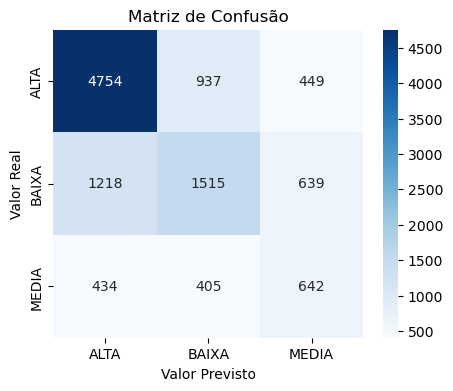

In [29]:
# Plotando a matriz de confusão como heatmap
labels = ['ALTA', 'BAIXA', 'MEDIA']
plot_confusion_matrix(y_test_bert, prediction, labels)